### Linear Regression
- Linear Regression is a machine learning model used to predict a continuous value based 1 or more specific inputs (feature)
- Simple Linear Regression: $\hat{y} = w \cdot x + b$
- Multiple Linear Regression: $\hat{y} = w_1 \cdot x_1 + w_2 \cdot x_2 + \cdots + w_n \cdot x_n + b$
- Notation: 
  + x: feature
  + y: real value
  + $\hat{y}$: predict value
  + w: weight/slope
  + b: bias
- When to use Linear Regression:
  + When the ralationship between input and output variables is linear
  + When you want an understandable, interpretable model
  + The data is not to complex, with little noise
- Limitations of Linear Regression
  + Not suitable if data is nonlinear
  + Sensitive to outliers
  + Cannot solve classification problem

### House Prices Predict use Linear Regression Model

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [63]:
data = pd.read_csv("Housing.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [64]:
X = data.loc[:, "area"].values
y = data.loc[:, "price"].values
print(X.shape)
print(y.shape)

(545,)
(545,)


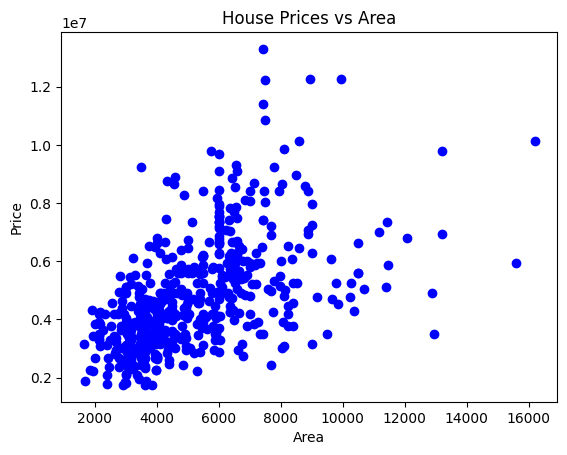

In [65]:
fig, ax = plt.subplots()
ax.scatter(X, y, color='blue', label='Data Points')
ax.set_title('House Prices vs Area')
ax.set_xlabel('Area')
ax.set_ylabel('Price')
plt.show()

In [66]:
model = LinearRegression()
model.fit(X.reshape(-1, 1), y)

LinearRegression()

In [67]:
y_pred = model.predict(X.reshape(-1, 1))

In [68]:
w = model.coef_
b = model.intercept_
print(f"Model coefficients: w = {w}, b = {b}")

Model coefficients: w = [461.97489427], b = 2387308.4823964303


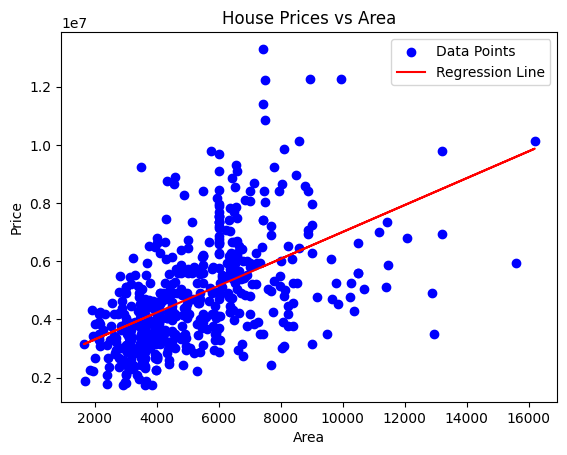

In [69]:
fig, ax = plt.subplots()
ax.scatter(X, y, color='blue', label='Data Points')
ax.set_title('House Prices vs Area')
ax.set_xlabel('Area')
ax.set_ylabel('Price')
ax.plot(X, y_pred, color='red', label='Regression Line')
ax.legend()
plt.show()

### House Price Predict without Library
- With simple linear regression model:
$$
w = \frac{\sum_{i=1}^{N}(x_i - \bar{x})({y_i - \bar{y}})}{\sum_{i=1}{N}(x_i - \bar{x})^2}
$$

$$
b = \bar{y} - w \bar{x}
$$

In [70]:
X_mean = np.mean(X)
y_mean = np.mean(y)

w = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean) ** 2)
b = y_mean - w * X_mean
print(f"Model coefficients: w = {w}, b = {b}")


Model coefficients: w = 461.9748942727835, b = 2387308.48239643


In [71]:
def predict(w, b, x):
    return w * x + b

In [72]:
y_pred = np.array([predict(w, b, x) for x in X])

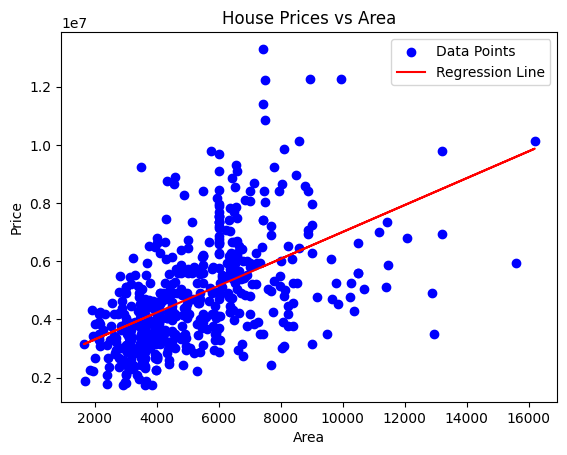

In [73]:
fig, ax = plt.subplots()
ax.scatter(X, y, color='blue', label='Data Points')
ax.set_title('House Prices vs Area')
ax.set_xlabel('Area')
ax.set_ylabel('Price')
ax.plot(X, y_pred, color='red', label='Regression Line')
ax.legend()
plt.show()

### House Price Predict use Gradient Descent

#### Loss Function
- Mean Squared Error (MSE) 
$$
\hat{y} = w \cdot x + b
$$

$$
L(w, b) = \frac{1}{N} \sum_{i=1}^{N} \left((w \cdot x_i + b) - y_i\right)^2 \tag{2}
$$

- 3 main methods to find w, b
  + Batch Gradient Descent: use the entire data to compute the gradient each time it updates
    $$
    w := w - \alpha \cdot \frac{1}{N} \sum_{i=1}^{N} \nabla_w L_i(w, b)
    $$
    $$
    b := b - \alpha \cdot \frac{1}{N} \sum_{i=1}^{N} \nabla_w L_i(w, b)
    $$
  + Stochastic Gradient Descent (SGD): Only use 1 sample per update.
    $$
    w := w - \alpha \cdot \nabla_w L_i(w, b)
    $$
    $$
    b := b - \alpha \cdot \nabla_w L_i(w, b)
    $$
  + Mini-batch Gradient Descent: Each update uses a small subset of the data (eg batch size = 32, 64...)
    $$
    w := w - \alpha \cdot \frac{1}{B} \sum_{j=1}^{B} \nabla_w L_j(w, b)
    $$ 
    $$
    b := b - \alpha \cdot \frac{1}{B} \sum_{j=1}^{B} \nabla_w L_j(w, b)
    $$
- Key Issues to Watch Out For
  1. Large Data Values Cause “Gradient Explosion”
  - Why it happens:
    - When the values of x and y are too large, the gradient $\nabla L(w, b)$ becomes extremely large.
    - When multiolied by the learning rate, this causes w and b to **explode** or **overflow**.
  - Result: You may get `nan`, `inf`, or absurd values for your paramaters.
  - Solution: 
    - Normalize your data: set `mean = 0`, `std = 1`
    - Use a smaller learing rate
    - Try more stable loss functions (e.g., Huber Loss) if needed
  2. Not Stopping at the Right Time (Early Stopping)
  - Why it happens:
    - If you train for too many epochs after the model has converged → you waste time.
    - If you stop too early → the model may not have fully converged yet.
  - Solution:
    - Monitor the loss function continuously
    - Stop training when the loss reduction becomes smaller than a threshold (e.g., 1e-6)


In [74]:
X_mean, X_std = np.mean(X), np.std(X)
y_mean, y_std = np.mean(y), np.std(y)

X_scaled = (X - X_mean) / X_std
y_scaled = (y - y_mean) / y_std

In [ ]:
def predict(w, b, x):
    return x * w + b

In [76]:
def cost_function(X, y, w, b):
    N = len(X)
    y_pred = predict(w, b, X)
    errors = (y_pred - y) ** 2
        
    return np.sum(errors) / (N)

In [ ]:
def update(X, y, w, b, learning_rate):
    N = len(X)
    
    y_pred = predict(w, b, X)
    errors = y_pred - y

    w_grad = np.sum(X * errors)
    b_grad = np.sum(errors)
        
    w -= (w_grad * 2 / N) * learning_rate
    b -= (b_grad * 2 / N) * learning_rate

    return w, b

In [78]:
def train(X, y, w, b, learning_rate, epochs):
    costs = []

    for i in range(epochs):
        w, b = update(X, y, w, b, learning_rate)
        costs.append(cost_function(X, y, w, b))

    return w, b, costs

In [79]:
w, b = 0.0, 0.0
learning_rate = 0.01
epochs = 1000
w, b, costs = train(X_scaled, y_scaled, w, b, learning_rate, epochs)

w = y_std / X_std * w
b = y_mean + y_std * b - w * X_mean

print(f"Model coefficients: w = {w}, b = {b}")

Model coefficients: w = 461.9748934952947, b = 2387308.486400919


In [80]:
y_pred = np.array([predict(w, b, x) for x in X])

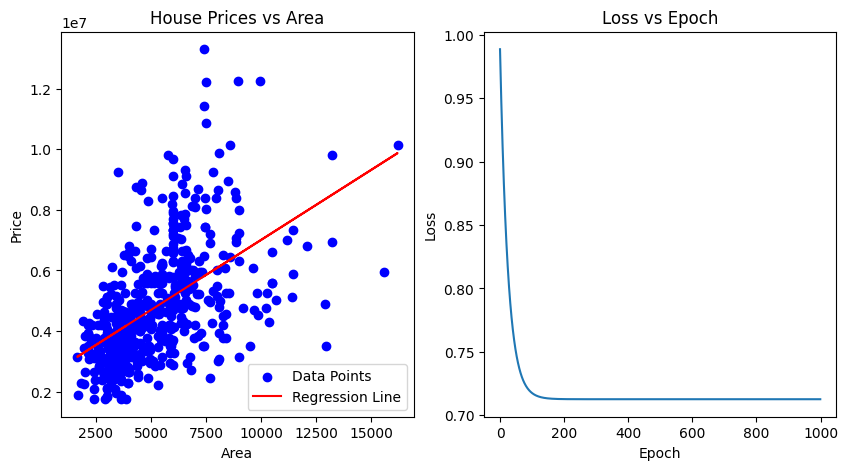

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].scatter(X, y, color="blue", label="Data Points")
ax[0].set_title("House Prices vs Area")
ax[0].set_xlabel("Area")
ax[0].set_ylabel("Price")
ax[0].plot(X, y_pred, color="red", label="Regression Line")
ax[0].legend()

ax[1].plot(costs)
ax[1].set_title("Loss vs Epoch")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")
plt.show()